# Graph Analysis in Julia

JuliaGraphs https://juliagraphs.github.io/ is the home for graph algorithms and analytics in Julia.

The main package is https://github.com/JuliaGraphs/LightGraphs.jl, which is written by Seth Bromberger and myself. With support from 63 other contributors https://github.com/JuliaGraphs/LightGraphs.jl/graphs/contributors.

In [61]:
using Pkg
Pkg.activate(".")
Pkg.add.(["LightGraphs", "GraphPlot", "Plots", "Colors", "Statistics", "DataFrames"])

 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
  [a93c6f00] + DataFrames v0.14.1
  Updating `Manifest.toml`
  [324d7699] + CategoricalArrays v0.4.0
  [a93c6f00] + DataFrames v0.14.1
  [9a8bc11e] + DataStreams v0.4.1
  [bd369af6] + Tables v0.1.10
  [ea10d353] + WeakRefStrings v0.5.3
  [9fa8497b] + Future 


6-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [62]:
using LightGraphs
using GraphPlot
using Colors

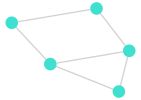

In [63]:
g = Graph(5)
add_edge!(g,1,2)
add_edge!(g,2,3)
add_edge!(g,3,4)
add_edge!(g,4,1)
add_edge!(g,1,5)
add_edge!(g,5,4)
gplot(g)

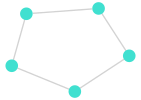

In [64]:
g = CycleGraph(5)
gplot(g)

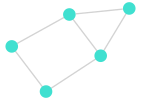

In [65]:
add_edge!(g,1,4)
gplot(g)

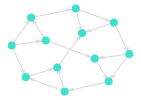

In [66]:
tetra = LightGraphs.SimpleGraphs.TruncatedTetrahedronDiGraph()
gplot(tetra)

In [67]:
tree = BinaryTree(4)

{15, 14} undirected simple Int64 graph

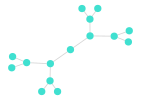

In [68]:
gplot(tree)

In [69]:
pagerank(tree)

15-element Array{Float64,1}:
 0.06518634764341544 
 0.09738924094387753 
 0.09738924094387753 
 0.1053241938675057  
 0.1053241938675057  
 0.1053241938675057  
 0.1053241938675057  
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856
 0.039842299374850856

In [70]:
using Colors

## Spring Layout

The classical layout algorithm is based on a ball and spring model from statistical physics.

J. Cohen "Drawing graphs to convey proximity: an incremental arrangement method" 1997.


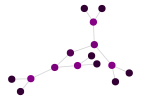

In [71]:
vcolors = [RGB(5v,0,5v) for v in pagerank(tree)]
gplot(tree, nodefillc=vcolors, layout=spring_layout)

## Spectral Layout

The Spectral layout is based on solving the eigenvalue equation of the graph
$$
    Ax = \lambda x
$$

For $x$ which is $(nv(g), 2)$ and $\lambda$ which is $(2,2)$.
The $x$ matrix then gives the vertex coordinates

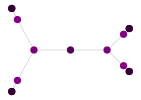

In [72]:
vcolors = [RGB(5v,0,5v) for v in pagerank(tree)]
gplot(tree, nodefillc=vcolors, layout=spectral_layout)

Spectral Layout is really cool, because of its mathematical properties. Like interchangeable vertices are assigned the same position. But not that practical outside of chemistry.

In [73]:
?gplot

search: gplot gplothtml pgfplots GraphPlot



Given a graph and two vectors of X and Y coordinates, returns a Compose tree of the graph layout

**Arguments**

`G` Graph to draw

`layout` Optional. Layout algorithm. Currently can be one of [random*layout, circular*layout, spring*layout, shell*layout, stressmajorize*layout, spectral*layout]. Default: `spring_layout`

`locs_x, locs_y` Locations of the nodes. Can be any units you want, but will be normalized and centered anyway

`NODESIZE` Optional. Max size for the nodes. Default: `3.0/sqrt(N)`

`nodesize` Optional. Relative size for the nodes, can be a Vector. Default: `1.0`

`nodelabel` Optional. Labels for the vertices, a Vector or nothing. Default: `nothing`

`nodelabelc` Optional. Color for the node labels, can be a Vector. Default: `colorant"black"`

`nodelabeldist` Optional. Distances for the node labels from center of nodes. Default: `0.0`

`nodelabelangleoffset` Optional. Angle offset for the node labels. Default: `π/4.0`

`NODELABELSIZE` Optional. Largest fontsize for the vertice labels. Default: `4.0`

`nodelabelsize` Optional. Relative fontsize for the vertice labels, can be a Vector. Default: `1.0`

`nodefillc` Optional. Color to fill the nodes with, can be a Vector. Default: `colorant"turquoise"`

`nodestrokec` Optional. Color for the nodes stroke, can be a Vector. Default: `nothing`

`nodestrokelw` Optional. Line width for the nodes stroke, can be a Vector. Default: `0.0`

`edgelabel` Optional. Labels for the edges, a Vector or nothing. Default: `[]`

`edgelabelc` Optional. Color for the edge labels, can be a Vector. Default: `colorant"black"`

`edgelabeldistx, edgelabeldisty` Optional. Distance for the edge label from center of edge. Default: `0.0`

`EDGELABELSIZE` Optional. Largest fontsize for the edge labels. Default: `4.0`

`edgelabelsize` Optional. Relative fontsize for the edge labels, can be a Vector. Default: `1.0`

`EDGELINEWIDTH` Optional. Max line width for the edges. Default: `0.25/sqrt(N)`

`edgelinewidth` Optional. Relative line width for the edges, can be a Vector. Default: `1.0`

`edgestrokec` Optional. Color for the edge strokes, can be a Vector. Default: `colorant"lightgray"`

`arrowlengthfrac` Optional. Fraction of line length to use for arrows. Equal to 0 for undirected graphs. Default: `0.1` for the directed graphs

`arrowangleoffset` Optional. Angular width in radians for the arrows. Default: `π/9 (20 degrees)`


In [74]:
using DelimitedFiles
A = readdlm("karate.txt", Int8);

## Zacharay Karate Club

http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary

### BACKGROUND 
These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred).

Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.

### REFERENCE

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.


In [75]:
using SparseArrays
using LinearAlgebra

In [76]:
zk1 = Graph(sparse(A[1:floor(Int, end/2),:]))
#zk2 = Graph(sparse(A[floor(Int, end/2)+1:end,:]))

{34, 78} undirected simple Int64 graph

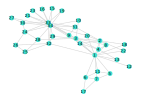

In [77]:
positions = spring_layout(zk1)
gplot(zk1, positions[1], positions[2], nodelabel=1:nv(zk1))

# Community Detection

A fundamental problem in graph analysis is the detection of communities. Communities are useful similar users on a social network, segmenting a city in neighborhoods based on a road network, or optimizing traffic on an computer network.

One classical algorithm is normalized cut, which is based on minimizing the following objective.

$$
\phi(S) = \frac{E(S,\bar{S})}{\min{(Size(S),Size(\bar{S})})}
$$

where $E(S,\bar{S})$ is the number of edges starting at vertices in S and ending at vertices in $\bar{S}$

$$
    \phi{(G)} = \min_{S\subset V}{\phi{(S)}}
$$

You want to find the minimizer set $S$

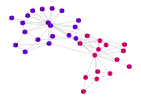

In [78]:
partition = normalized_cut(zk1, 0.5)
gplot(zk1, positions[1], positions[2], nodelabel=1:nv(zk1), nodefillc=[RGB(1/v,0,v/2) for v in partition])

In [79]:
function _normalized_cut_cost(cut, W::AbstractMatrix, D)
    cut_cost = 0
    for j in axes(W, 2)
        for i in axes(W, 1)
            if cut[i] != cut[j]
                cut_cost += W[i, j]
            end
        end
    end
    cut_cost /= 2
    return cut_cost / sum(D * cut) + cut_cost / sum(D * (.~cut))
end


_normalized_cut_cost (generic function with 1 method)

In [80]:
_normalized_cut_cost(partition, weights(zk1), diagm(0=>degree(zk1)))

0.4495813614852565

## Solving Normalized Cut 

Normalized cut is a discrete optimization problem, that is solved using a relaxation to the eigendecomposition of the graph laplacian.

The Laplacian Matrix:
$$ L = D-A$$

The Eigenvalue equation:
$$Lx = \lambda x$$

Algebraic connectivity:
$$\min_{\lambda > 0}{\lambda}$$

In [81]:
using LightGraphs.LinAlg
using LinearAlgebra
L = laplacian_matrix(zk1)
eigvals(Matrix(L))[1:3]

3-element Array{Float64,1}:
 -2.522043988591143e-15
  0.4685252267013963   
  0.9092476638033117   

## Graph Ranking

Ranking vertices is important for web search. Google's original innovation is to model the WWW as a graph and apply pagerank to find important pages to show their users.

Important nodes can be identified:

1. Informative Pages in the Web Graph
2. Central brokers in a financial network
3. Content Influencers in a social network


```julia
function pagerank(
    g::AbstractGraph{U}, 
    α=0.85, 
    n=100::Integer, 
    ϵ=1.0e-6
    ) where U <: Integer
    # collect dangling nodes
    dangling_nodes = [v for v in vertices(g) if outdegree(g, v) == 0]
    N = Int(nv(g))
    # solution vector and temporary vector
    x = fill(1.0 / N, N)
    xlast = copy(x)
    # personalization vector
    p = fill(1.0 / N, N)
    # adjustment for leaf nodes in digraph
    dangling_weights = p
    for _ in 1:n
        dangling_sum = 0.0
        for v in dangling_nodes
            dangling_sum += x[v]
        end
        # flow from teleprotation
        for v in vertices(g)
            xlast[v] = (1 - α + α * dangling_sum) * p[v]
        end
        # flow from edges
        
        for v in vertices(g)
            for u in inneighbors(g, v)
                xlast[v] += α * x[u] / outdegree(g, u)
            end
        end
        # l1 change in solution convergence criterion
        err = 0.0
        for v in vertices(g)
            err += abs(xlast[v] - x[v])
            x[v] = xlast[v]
        end
        if (err < N * ϵ)
            return x
        end
    end
    error("Pagerank did not converge after $n iterations.") # TODO 0.7: change to InexactError with appropriate msg.
end
```

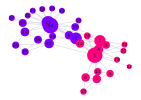

In [82]:
gplot(zk1, positions[1], positions[2],
      nodelabel=1:nv(zk1),
      nodesize = -2 .*sqrt.(pagerank(zk1)),
      nodefillc=[RGB(1/v,0,v/2) for v in partition])

### Many Graph Ranking schemes

You can define many different ways to rank a graph. They are often correlated.

In [83]:
using DataFrames

In [84]:
katz_cent(x)=katz_centrality(x, 0.10)
centralities = [degree, degree_centrality, eigenvector_centrality,
                pagerank, katz_cent,
                closeness_centrality,
                stress_centrality, betweenness_centrality]
ratings = DataFrame(Dict(nameof(f)=>f(zk1) for f in centralities))
head(ratings)

,betweenness_centrality,closeness_centrality,degree,degree_centrality,eigenvector_centrality,katz_cent,pagerank,stress_centrality
,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,0.437635,0.568966,16,0.484848,0.355491,0.321325,0.0970018,1526
2,0.0539367,0.485294,9,0.272727,0.26596,0.235484,0.0528784,249
3,0.143657,0.559322,10,0.30303,0.317193,0.265766,0.0570784,469
4,0.0119093,0.464789,6,0.181818,0.21118,0.194913,0.0358606,57
5,0.000631313,0.37931,3,0.0909091,0.0759688,0.121904,0.0219794,2
6,0.0299874,0.383721,4,0.121212,0.079483,0.130972,0.0291133,116


In [85]:
using Statistics

In [86]:
DataFrame(Statistics.cor(Matrix(ratings)), DataFrames._names(ratings))

,betweenness_centrality,closeness_centrality,degree,degree_centrality,eigenvector_centrality,katz_cent,pagerank,stress_centrality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.717945,0.914643,0.914643,0.803215,0.865582,0.923134,0.986819
2,0.717945,1.0,0.771591,0.771591,0.904618,0.877428,0.742256,0.77233
3,0.914643,0.771591,1.0,1.0,0.917255,0.966511,0.997903,0.92475
4,0.914643,0.771591,1.0,1.0,0.917255,0.966511,0.997903,0.92475
5,0.803215,0.904618,0.917255,0.917255,1.0,0.987987,0.891918,0.840572
6,0.865582,0.877428,0.966511,0.966511,0.987987,1.0,0.950065,0.894379
7,0.923134,0.742256,0.997903,0.997903,0.891918,0.950065,1.0,0.92961
8,0.986819,0.77233,0.92475,0.92475,0.840572,0.894379,0.92961,1.0


In [87]:
using Plots

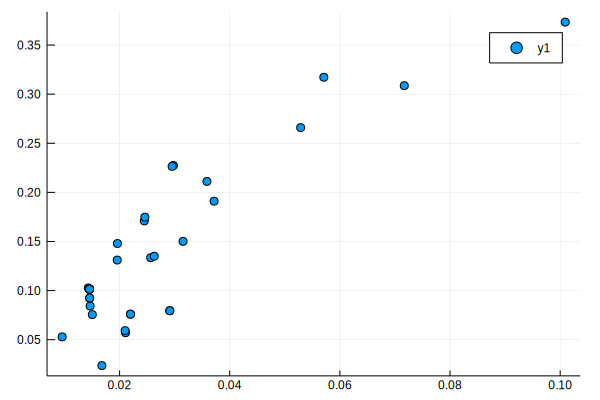

In [88]:
scatter(ratings.pagerank, ratings.eigenvector_centrality)

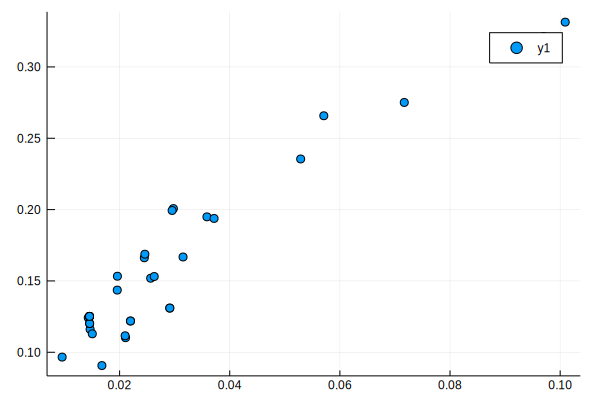

In [89]:
scatter(ratings.pagerank, ratings.katz_cent)

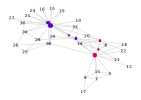

In [90]:
gplot(zk1, positions[1], positions[2],
      nodelabel=1:nv(zk1),
      nodesize = degree(zk1),
      nodefillc=[RGB(1/v,0,v/2) for v in partition])

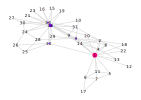

In [91]:
gplot(zk1, positions[1], positions[2],
      nodelabel=1:nv(zk1),
      nodesize = (betweenness_centrality(zk1)),
      nodefillc=[RGB(1/v,0,v/2) for v in partition])

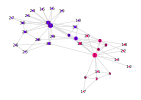

In [92]:
gplot(zk1, positions[1], positions[2],
      nodelabel=1:nv(zk1),
      nodesize = (katz_centrality(zk1, 0.1)),
      nodefillc=[RGB(1/v,0,v/2) for v in partition])

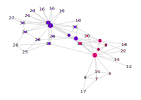

In [93]:
gplot(zk1, positions[1], positions[2],
      nodelabel=1:nv(zk1),
      nodesize = (eigenvector_centrality(zk1)),
      nodefillc=[RGB(1/v,0,v/2) for v in partition])